In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Question 2

In [12]:
# Define the input features and corresponding labels for each gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


y_AND = np.array([0, 0, 0, 1])
y_OR = np.array([0, 1, 1, 1])
y_XOR = np.array([0, 1, 1, 0])
y_NAND = np.array([1, 1, 1, 0])


df_X = pd.DataFrame(X, columns=['A', 'B'])

df_gates = pd.DataFrame({
    "AND" : y_AND,
    "OR" : y_OR,
    "XOR" : y_XOR, 
    "NAND" : y_NAND
})


df_all = pd.concat([df_X, df_gates], axis=1)
df_all

,A,B,AND,OR,XOR,NAND
0,0,0,0,0,0,1
1,0,1,0,1,1,1
2,1,0,0,1,1,1
3,1,1,1,1,0,0


In [16]:
df_gates['AND']

0    0
1    0
2    0
3    1
Name: AND, dtype: int64

In [19]:
def evaluate_model(model, X, y):
    """
    Evaluate the trained model on given data and returns accuracy
    args:
        model: Trained Model Object
        X : X values
        y : y values
    returns:
        accuracy: accuracy score of the model
    """
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    return accuracy


def train_model(model, X, y):
    """Given X, y and a model, the method trains and evaluate the model on the given data"""
    #print(f"Train Data\n{X}\n\nTrain Labels\n{y}\n")
    model = model.fit(X, y)
    predicted_labels = model.predict(X)
    #print(f"Predicted Labels\n{predicted_labels}\n")
    train_acc = evaluate_model(model, X, y)
    return train_acc, model

### a) Logistic Regression

In [24]:
print("Model Used : Logistic Regresion")
for gate in df_gates.columns:
    lr_model = LogisticRegression(penalty=None)
    y = df_gates[gate].values
    X = df_X.values
    acc, _ = train_model(lr_model, X, y)
    print(f"Gate : {gate} Accuracy : {acc * 100}")

Model Used : Logistic Regresion
Gate : AND Accuracy : 100.0
Gate : OR Accuracy : 100.0
Gate : XOR Accuracy : 50.0
Gate : NAND Accuracy : 100.0


### b) Support Vector Classifier with RBF Kernel

In [25]:
print("Model Used : SVC")
for gate in df_gates.columns:
    svc_model = SVC()
    y = df_gates[gate].values
    X = df_X.values
    acc, _ = train_model(svc_model, X, y)
    print(f"Gate : {gate} Accuracy : {acc * 100}")

Model Used : SVC
Gate : AND Accuracy : 100.0
Gate : OR Accuracy : 100.0
Gate : XOR Accuracy : 100.0
Gate : NAND Accuracy : 100.0


### **Conclusion**

- **Logistic Regression** : Logistic regression is perfectly trained for AND, OR, NAND gate but perform poorly on XOR gate. This is because XOR gate has non-linear decision boundary while the other gates have linear decision boundary. Due to linear nature of Logistic regression, it can not fit well non-linear decision boundaries and hence perform poorly on XOR gate.
- **Support Vector Classifier** : SVC with default rbf kernel is non-linear in nature and hence can fit non-linear boundaries properly. Therefore it has performed with 100 % accuracy for all the gates

# Question 3

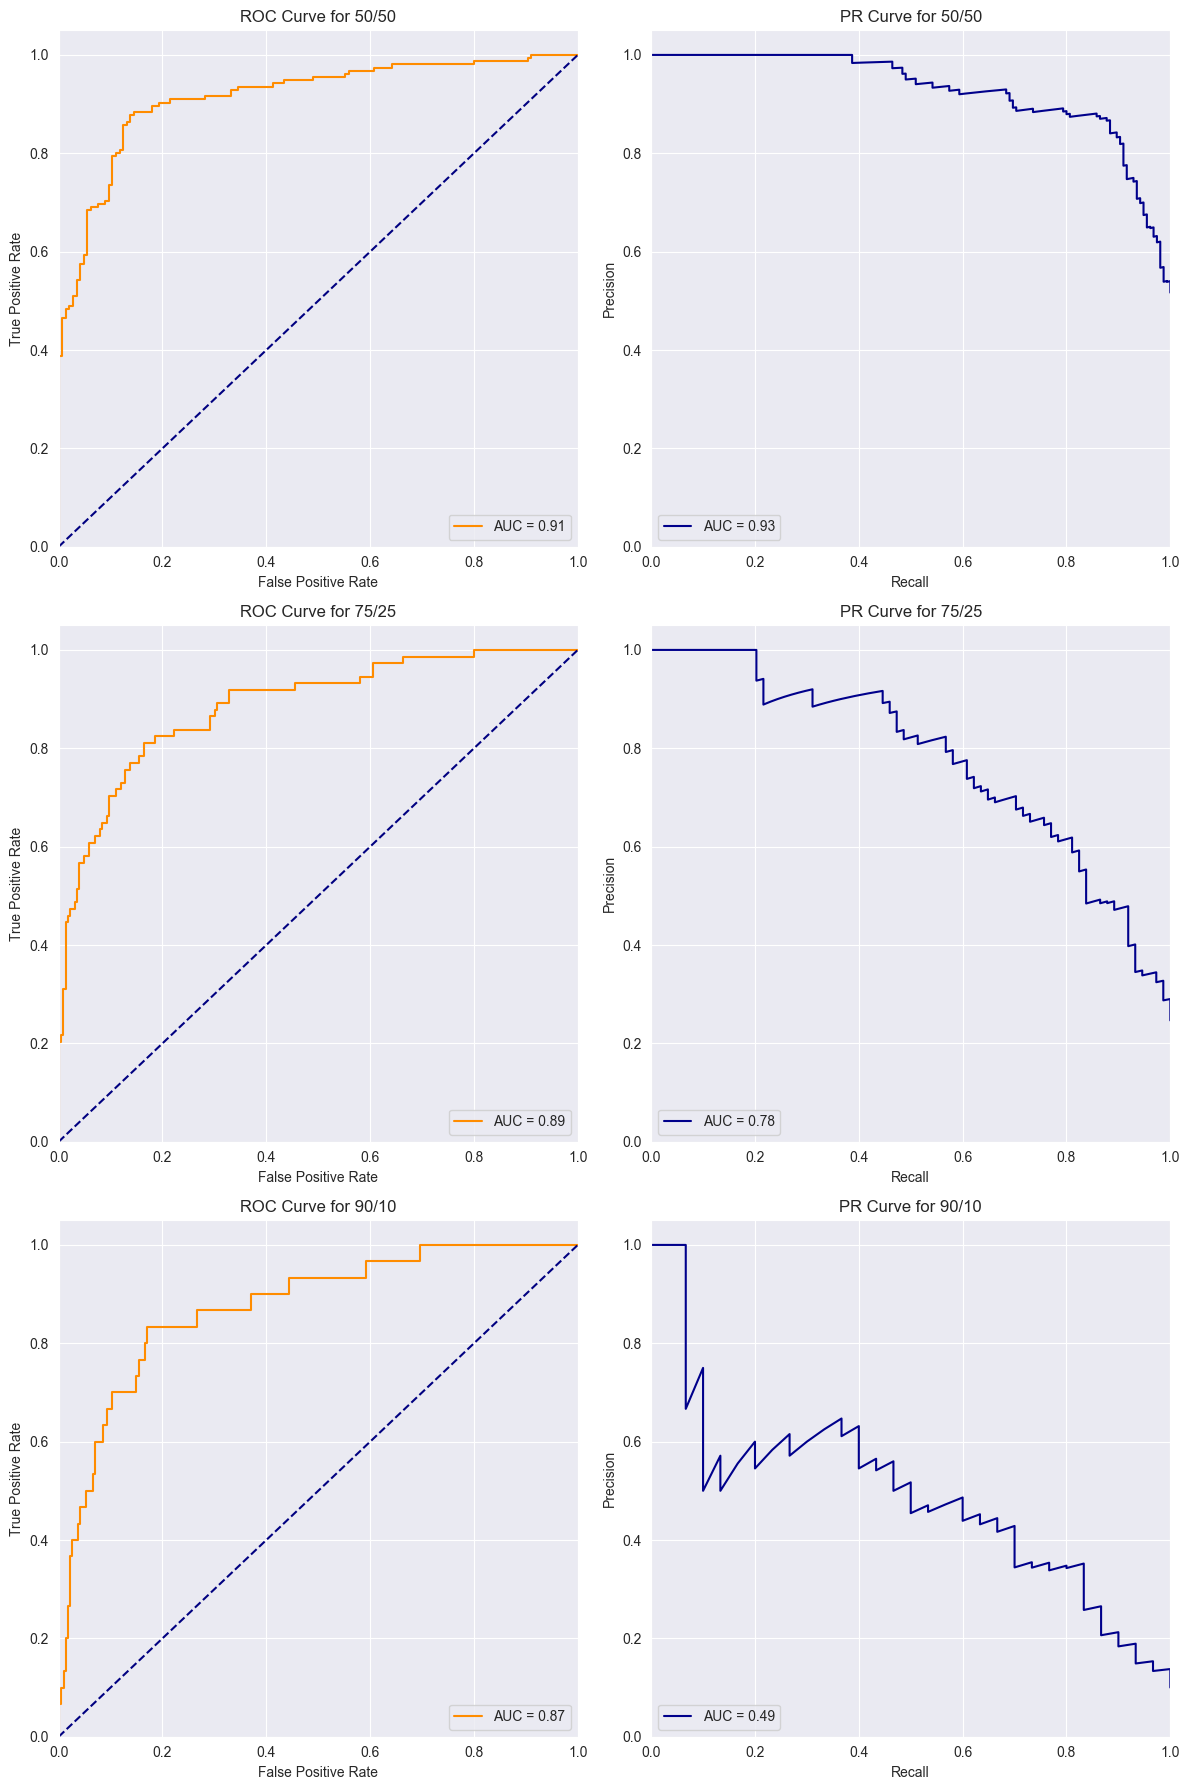

In [36]:
# Settings for imbalance levels and plots
imbalance_levels = [0.5, 0.75, 0.9]  # Proportion of positive class
labels = ['50/50', '75/25', '90/10']
colors = ['blue', 'green', 'red']


# Figure setup for individual plots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows for 3 levels, 2 columns for ROC and PR

# Loop through each imbalance level and plot on separate axes
for i, pos_ratio in enumerate(imbalance_levels):
    # Generate synthetic data
    X, y = make_classification(n_samples=1000, n_classes=2, weights=(pos_ratio, 1-pos_ratio), random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    axes[i, 0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
    axes[i, 0].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axes[i, 0].set_xlim([0.0, 1.0])
    axes[i, 0].set_ylim([0.0, 1.05])
    axes[i, 0].set_xlabel('False Positive Rate')
    axes[i, 0].set_ylabel('True Positive Rate')
    axes[i, 0].set_title(f'ROC Curve for {labels[i]}')
    axes[i, 0].legend(loc="lower right")

    # PR Curve
    precision, recall, _ = precision_recall_curve(y_test, probs)
    pr_auc = auc(recall, precision)
    axes[i, 1].plot(recall, precision, label=f'AUC = {pr_auc:.2f}', color='darkblue')
    axes[i, 1].set_xlim([0.0, 1.0])
    axes[i, 1].set_ylim([0.0, 1.05])
    axes[i, 1].set_xlabel('Recall')
    axes[i, 1].set_ylabel('Precision')
    axes[i, 1].set_title(f'PR Curve for {labels[i]}')
    axes[i, 1].legend(loc="lower left")

plt.tight_layout()
plt.show()


### **Observations:**

- **50/50 (Balanced)**
    - ROC Curve: The ROC curve shows a high AUC of 0.91, which suggests that the model has good discriminative ability between the positive and negative classes.
    - PR Curve: The PR curve also demonstrates a high AUC of 0.93. This indicates that the model maintains high precision across different levels of recall, which is expected in a balanced dataset.

- **75/25 (Moderate Imbalance)**
    - ROC Curve: The ROC curve remains relatively stable with an AUC of 0.89, only slightly lower than the balanced case. This suggests that the model's ability to discriminate between classes is not severely affected by this level of imbalance.
    - PR Curve: There is a noticeable decline in the PR curve's AUC to 0.78. This drop signifies that as the positive class becomes less prevalent, maintaining high precision across all levels of recall is more challenging.

- **90/10 (High Imbalance)**
    - ROC Curve: The AUC of the ROC curve decreases to 0.87. While this might still seem like a relatively good performance, it is important to remember that ROC curves can be overly optimistic in the presence of a high class imbalance.
    - PR Curve: The PR curve exhibits a significant decline with an AUC of just 0.49, which is considerably lower than in the balanced and moderately imbalanced scenarios. This curve sharply illustrates the difficulties the model faces in correctly classifying the minority class as the imbalance increases. Precision drops significantly, reflecting the impact of the imbalance and the challenge of correctly identifying the fewer instances of the positive class.
      
**Overall Summary:**
- ROC Curve Analysis: Indicates a relatively stable discriminative ability across all levels of class imbalance but does not provide a complete picture in the presence of a high class imbalance.
- PR Curve Analysis: Shows a significant impact on the model's precision with increasing class imbalance, highlighting the importance of this metric in the presence of rare positive classes.
- Implications: The findings underline the necessity of looking beyond the ROC AUC, especially when working with imbalanced datasets. The PR curve is a crucial metric for evaluating model performance in such cases, as it provides insights that the ROC curve may not, particularly regarding the model's ability to identify the positive class accurately.







# Question 4

In [37]:
from IPython.display import Image

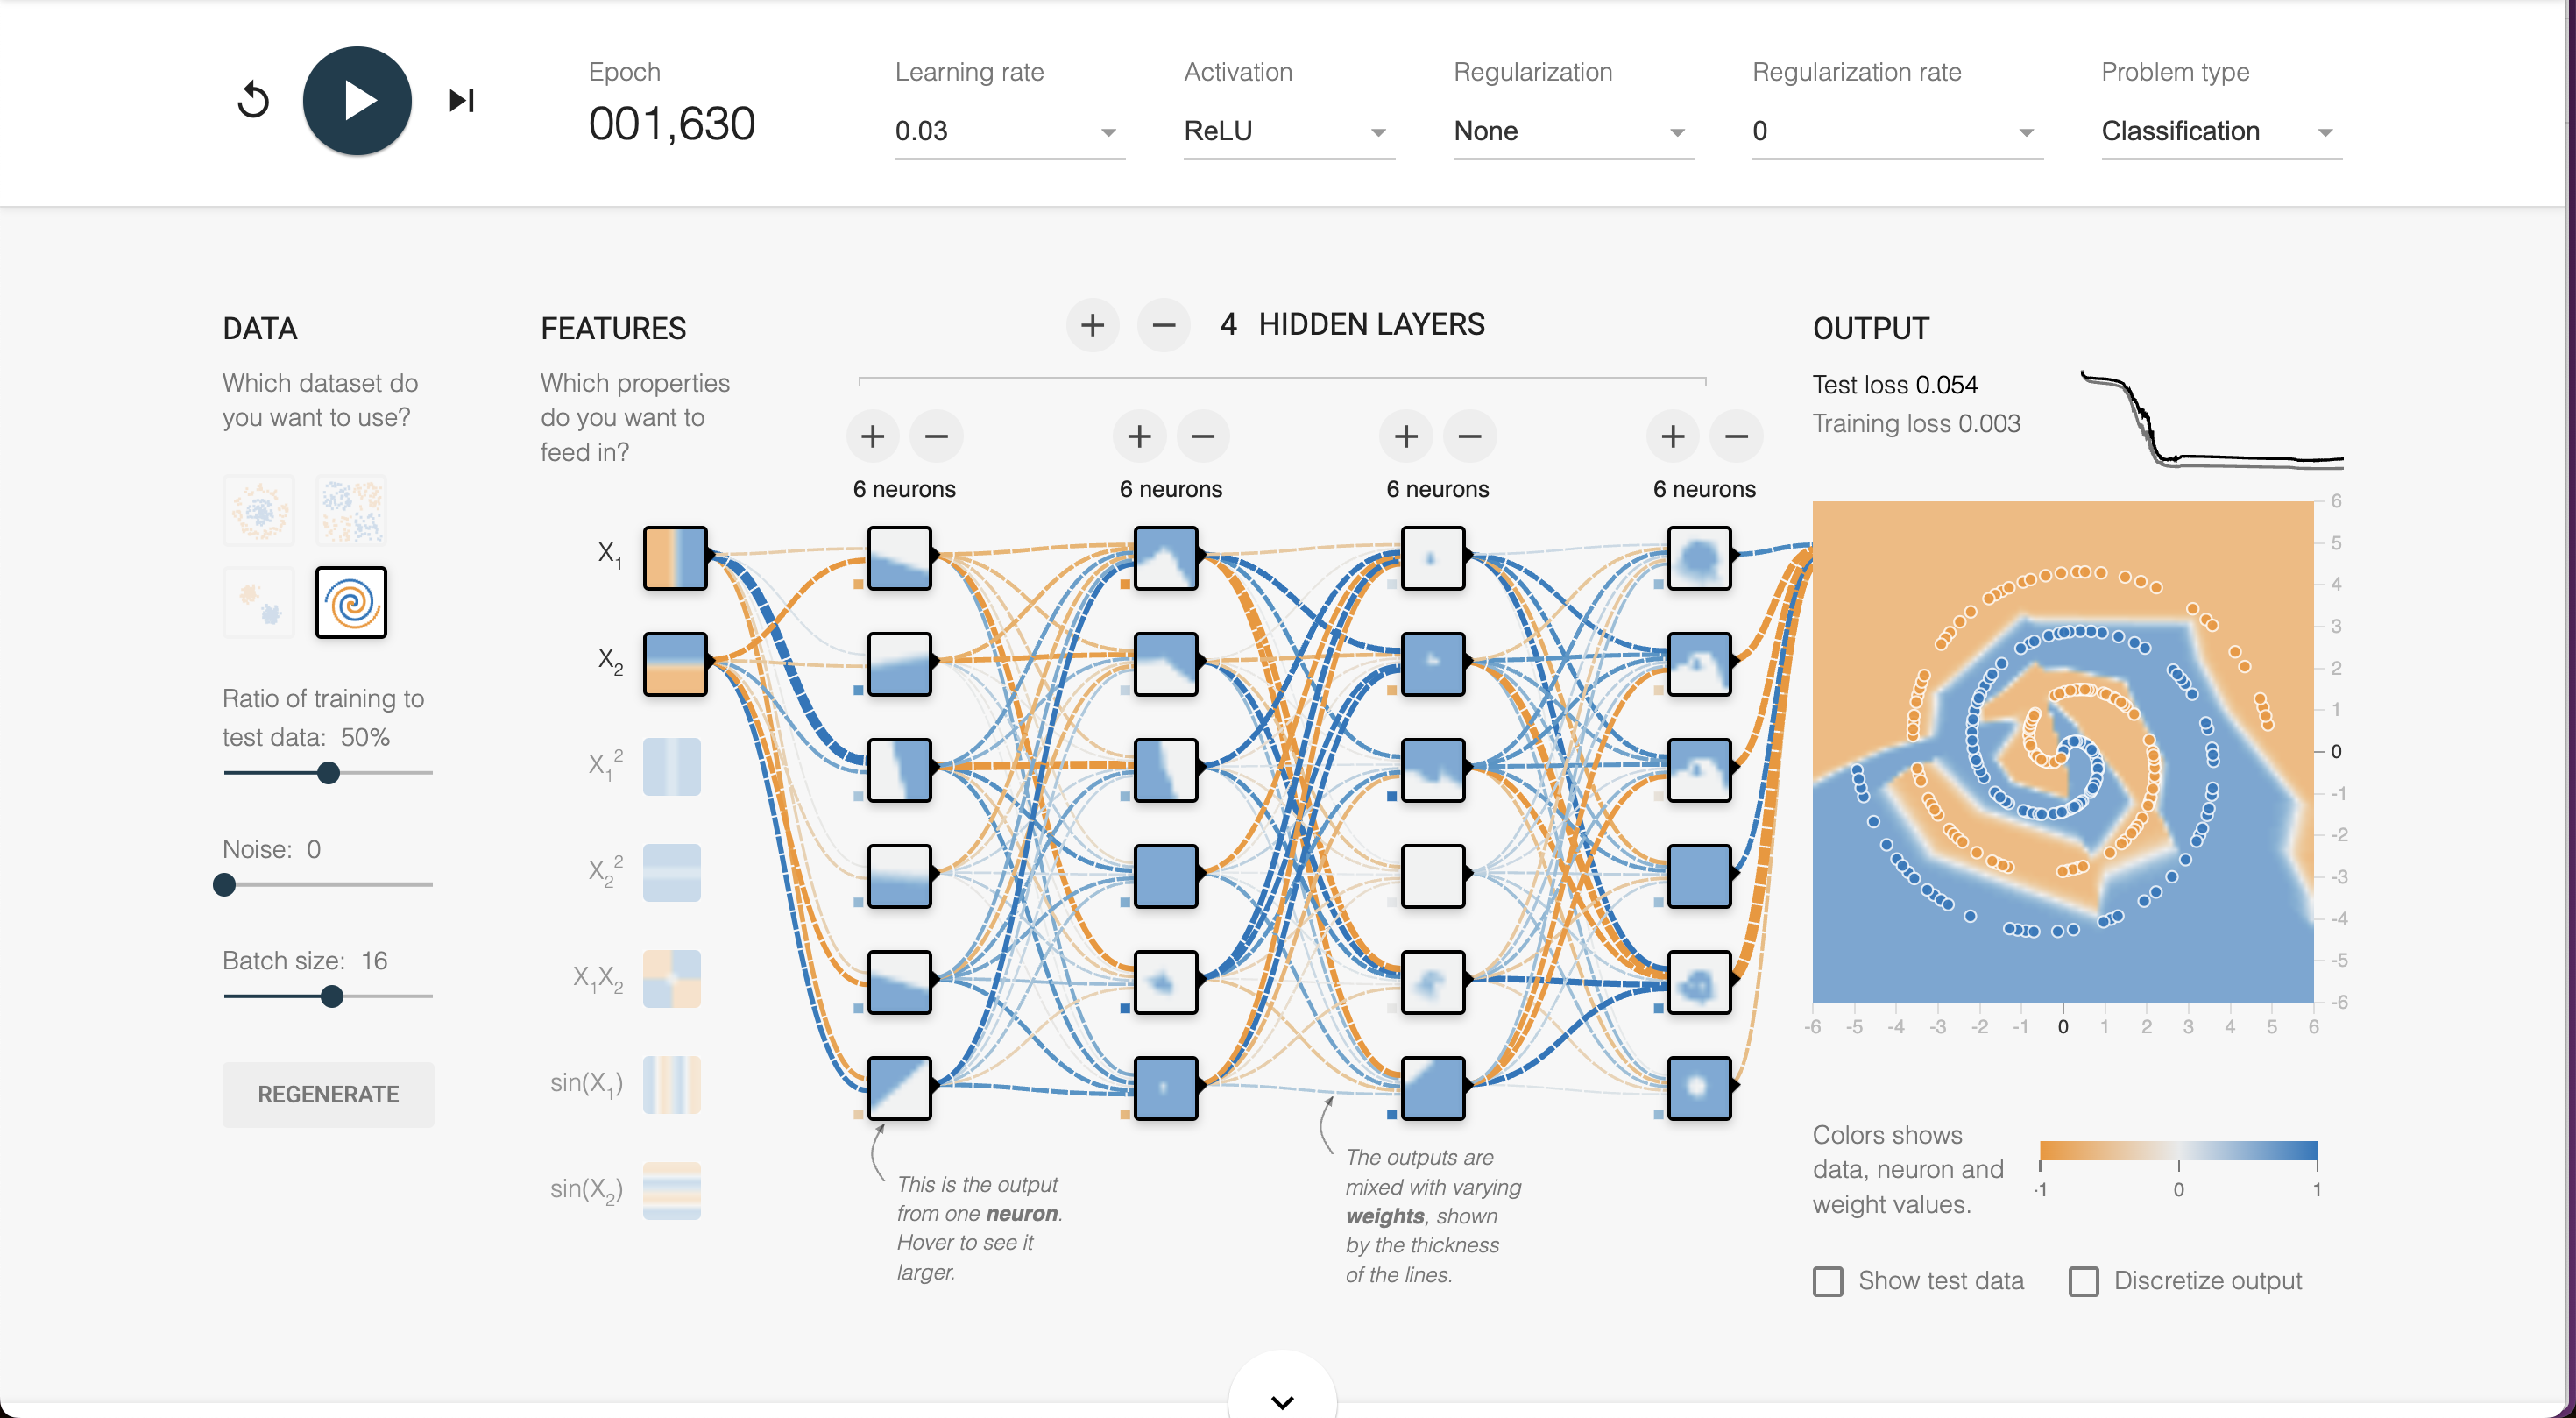

In [38]:
Image('q4.png')

**Neural Network Architecture**
- Hidden Layers: There are 4 hidden layers, each with 6 neurons. This configuration adds complexity and depth to the model, allowing it to learn the intricate spiral pattern.
- Activation Function: The ReLU (Rectified Linear Unit) activation function is used in the hidden layers. ReLU helps the network learn non-linear relationships without suffering from the vanishing gradient problem common with sigmoid or tanh functions.

**Choice of Hyperparameters:**
- Learning Rate: Set at 0.03. This value is important for the convergence of the neural network during training. A learning rate of 0.03 is a balanced choice that's not too slow (which would take long to converge) or too fast (which could overshoot the minimum loss).
- Problem Type: The network is solving a classification problem, aiming to categorize data points into two classes.
- Epoch: The model has run for 1630 epochs, which are full iterations over the entire dataset. The number of epochs indicates the model was trained until the loss values stabilized.
- Batch Size: Set at 16. Smaller batch sizes can provide a regularization effect and allow for more frequent updates to the model's weights, which can be beneficial for learning complex patterns.

The test loss is low at 0.054 and the training loss is even lower at 0.003, suggesting that the model has learned the training data well and generalizes effectively to the test data.